Feature Scaling

two types - 1. Standardization : it is very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equal to 1.
                                Xnew = (Xi - Xmean) /Standard Deviation.   
            2. Normalization : it is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. it is also known as Min-Max scaling.
                                Xnew = (Xi - Xmean) / (max(X) - Min(X))

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("loan.csv")
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [23]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

Standardization

In [24]:
df["dti"].fillna(df["dti"].mean(),inplace= True)

/tmp/ipykernel_152397/2871955901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dti"].fillna(df["dti"].mean(),inplace= True)


/tmp/ipykernel_152397/4264116077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["dti"])


<function matplotlib.pyplot.show(close=None, block=None)>

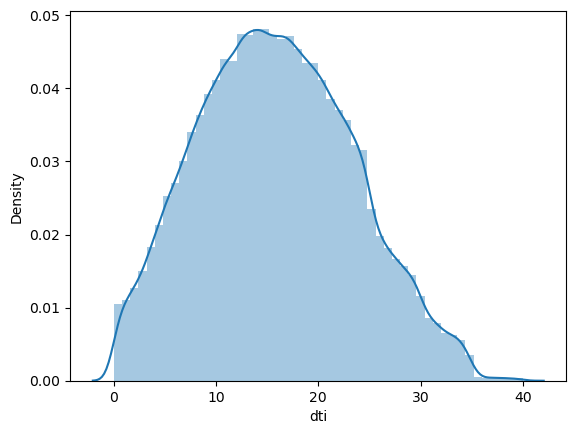

In [25]:
sns.distplot(df["dti"])
plt.show

In [26]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
ss.fit(df[["dti"]])

StandardScaler()

In [29]:
df["dti_ss"] = pd.DataFrame(ss.transform(df[["dti"]]), columns=['x'])

In [30]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,dti_ss
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,1.551004
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,-1.961284
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,-0.943841
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified,0.542786
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified,-0.616994


In [31]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,dti_ss
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000,1.639870e+05
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274,-3.202841e-16
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733,1.000003e+00
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.093078e+00
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,-7.448332e-01
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,-3.446789e-02
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,7.088457e-01
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000,3.177332e+00


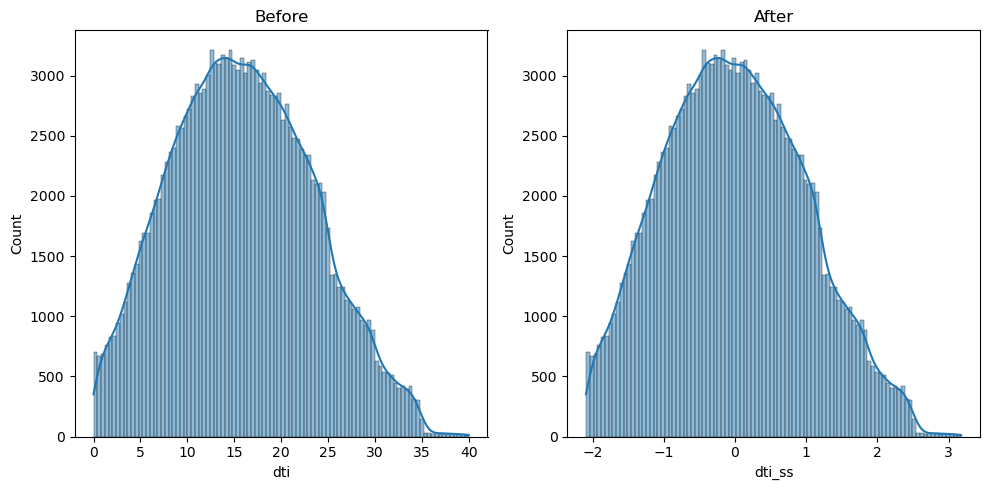

In [33]:
plt.figure(figsize=(10, 5))

# Plotting the original dti
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df["dti"], kde=True)

# Plotting the transformed dti
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df["dti_ss"], kde=True)

plt.tight_layout()
plt.show()

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()
ms.fit(df[["dti"]])

MinMaxScaler()

In [ ]:
df["dti_ms"] = ms.transform(df[["dti"]])

In [ ]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,dti_ss,dti_ms
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,1.551004,0.691423
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,-1.961284,0.025006
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,-0.943841,0.218055
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified,0.542786,0.500125
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified,-0.616994,0.280070


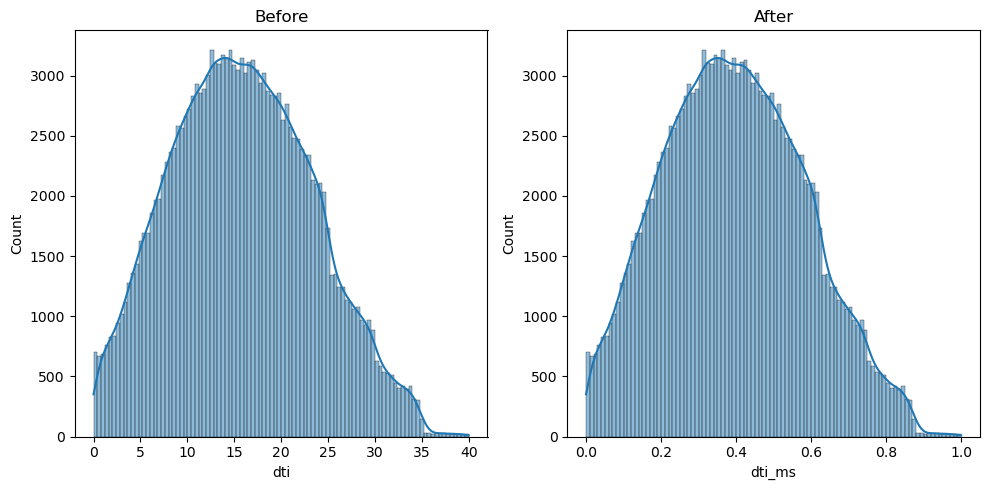

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting the original dti
plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(df["dti"], kde=True)

# Plotting the transformed dti
plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(df["dti_ms"], kde=True)

plt.tight_layout()
plt.show()